In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch.nn as nn
import torch

In [4]:
from utils import MnistData
from models import ModelManager, ModelType

In [11]:
model_loaded = ModelManager.get_trained(ModelType.MnistCnnPatt)


In [6]:
discriminator = ModelManager.get_trained(ModelType.MnistGanDiscriminator)

In [7]:
data = MnistData()

In [12]:
batch_size = 10
step_size = 1e-2
_, labels = data.get_training_batch(10)
images = torch.rand((batch_size, 1, 28, 28))
loss_fn = nn.CrossEntropyLoss()
for i in range(100):
    images.requires_grad = True
    if images.grad is not None:
        images.grad.zero_()
    loss = loss_fn(model_loaded(images), labels)
    loss.backward()
    new_images = images - step_size * images.grad.apply_(lambda x: 1 if x >= 0 else -1)
    images = MnistData.clip_for_image(new_images)

In [13]:
discriminator(images)

tensor([[1.0000],
        [1.0000],
        [0.9999],
        [0.9999],
        [1.0000],
        [1.0000],
        [0.9999],
        [1.0000],
        [1.0000],
        [1.0000]], grad_fn=<SigmoidBackward>)

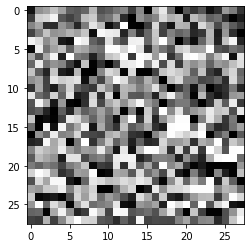

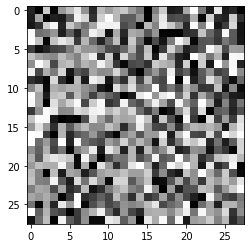

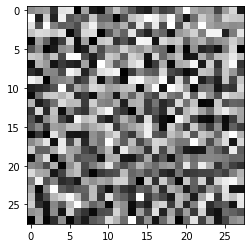

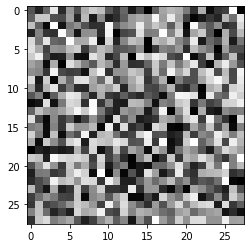

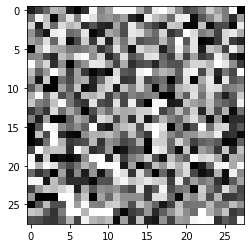

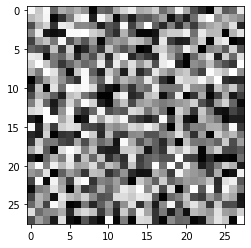

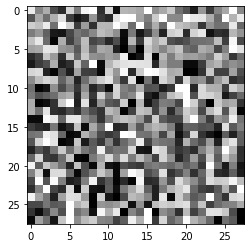

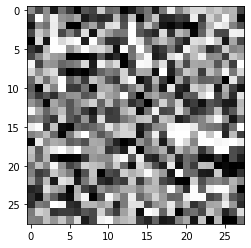

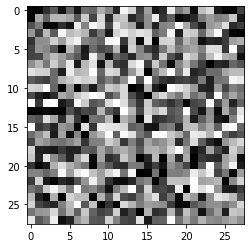

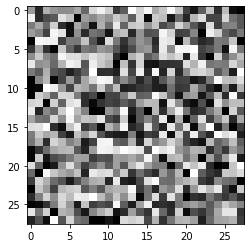

In [14]:
for i in range(batch_size):
    MnistData.display(images[i], True)